# STUDENT GRADE PREDICTION USING PYTHON

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.LOAD THE DATASET

In [3]:
df=pd.read_csv('Grades.csv')

# 2.DISPLAY TOP 5 ROWS OF DATASET

In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# 2.DISPLAY LAST 5 ROWS OF DATASET

In [5]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


# 3.DISPLAY TOTAL NUMBER OF ROWS AND COLUMNS PRESENT IN OUR DATASET

In [6]:
print('NUMBER OF ROWS...',df.shape[0])
print('NUMBER OF COLUMNS...',df.shape[1])

NUMBER OF ROWS... 571
NUMBER OF COLUMNS... 43


# 4.DISPLAY FULL INFORMATION OF OUR DATASET

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

as we can see all the independent features of our dataset is in 'object' data type 
so we need to convert the object or catagorical features into numerical, using encoding method

# 5.CHECKING NULL VALUES

In [8]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

as we can see their are null values preset in most of the columns

In [9]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [10]:
df.loc[df['EF-303'].isnull()==True]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418
91,CS-97092,WU,C-,D,D,WU,D,D,D,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380
137,CS-97138,C-,C+,WU,WU,WU,B,WU,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
142,CS-97143,C+,B-,B,A-,A,A-,C,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.943
143,CS-97144,D,D,WU,WU,WU,D,WU,WU,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
281,CS-97282,WU,D+,F,F,F,D,NaN,D,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.092
282,CS-97283,B-,C+,D+,D,A-,B-,B,B+,NaN,...,F,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,2.086
288,CS-97289,D,C-,D,C,D,D,B-,F,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800


In [11]:
df2=df.copy()

In [12]:
df2.loc[df2['EF-303'].isnull()==True]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418
91,CS-97092,WU,C-,D,D,WU,D,D,D,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380
137,CS-97138,C-,C+,WU,WU,WU,B,WU,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
142,CS-97143,C+,B-,B,A-,A,A-,C,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.943
143,CS-97144,D,D,WU,WU,WU,D,WU,WU,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
281,CS-97282,WU,D+,F,F,F,D,NaN,D,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.092
282,CS-97283,B-,C+,D+,D,A-,B-,B,B+,NaN,...,F,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,2.086
288,CS-97289,D,C-,D,C,D,D,B-,F,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800


# 6.FILLING NULL VALUES WITH MODE VALUES

In [13]:
mode=df2['EF-303'].mode()

In [14]:
mode

0    B
Name: EF-303, dtype: object

In [15]:
df2['EF-303']=df2['EF-303'].fillna(mode[0])

In [16]:
for i in df2.columns:
    df2[i]=df2[i].fillna(df2[i].mode()[0])
    

# checking again Null Values

In [17]:
df2.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

# Checking DataTypes

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

In [19]:
#dropping the Seat no columns
df2.head()


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# 7. DATA VISUALIZATION

<Axes: xlabel='PH-121', ylabel='count'>

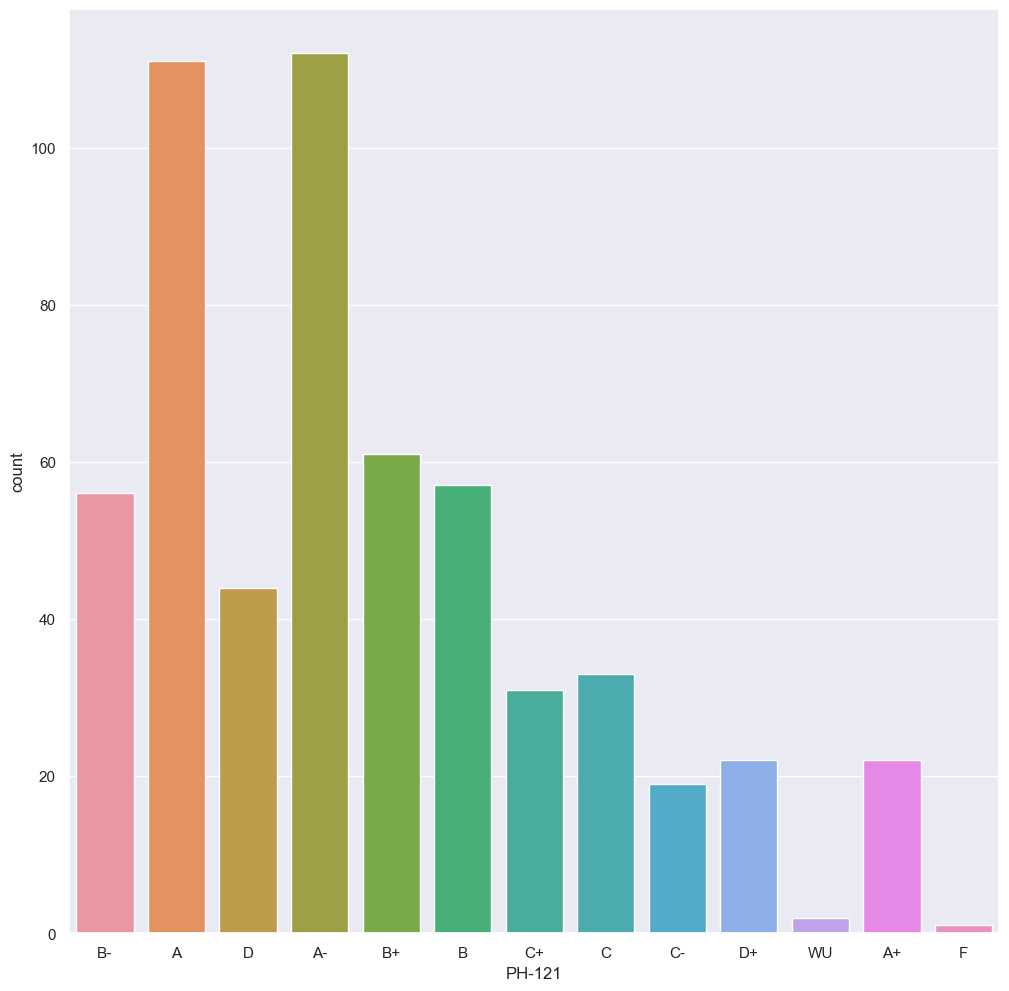

In [20]:
plt.figure(figsize=(12,12))
sns.set()
sns.countplot(x='PH-121',data=df2)

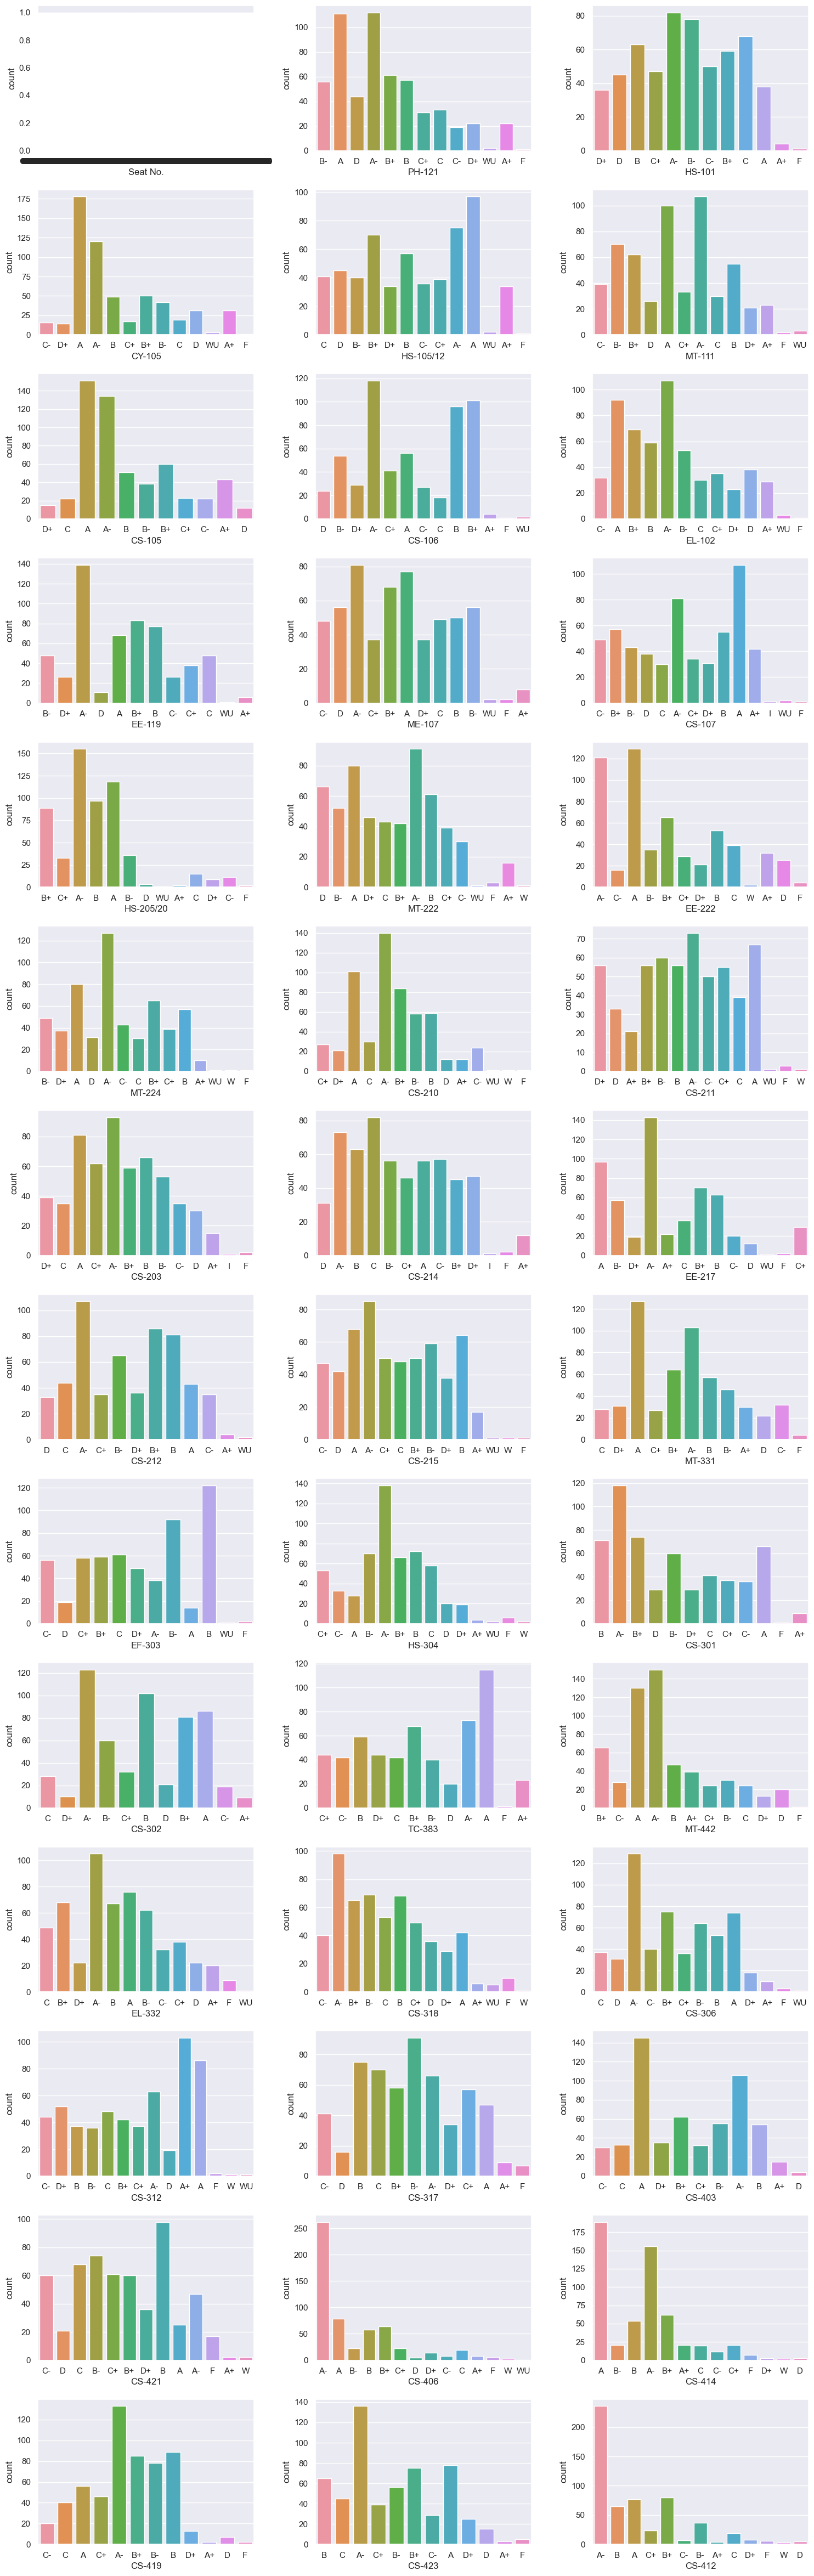

In [21]:
# count plot for all columns
plt.figure(figsize=(15,50))
plotnumber=1
for i in df2.columns[:-1]:
    if plotnumber<=43:
        plt.subplot(15,3,plotnumber)
        sns.countplot(x=i,data=df2)
    plotnumber+=1
plt.tight_layout()
plt.show()
    

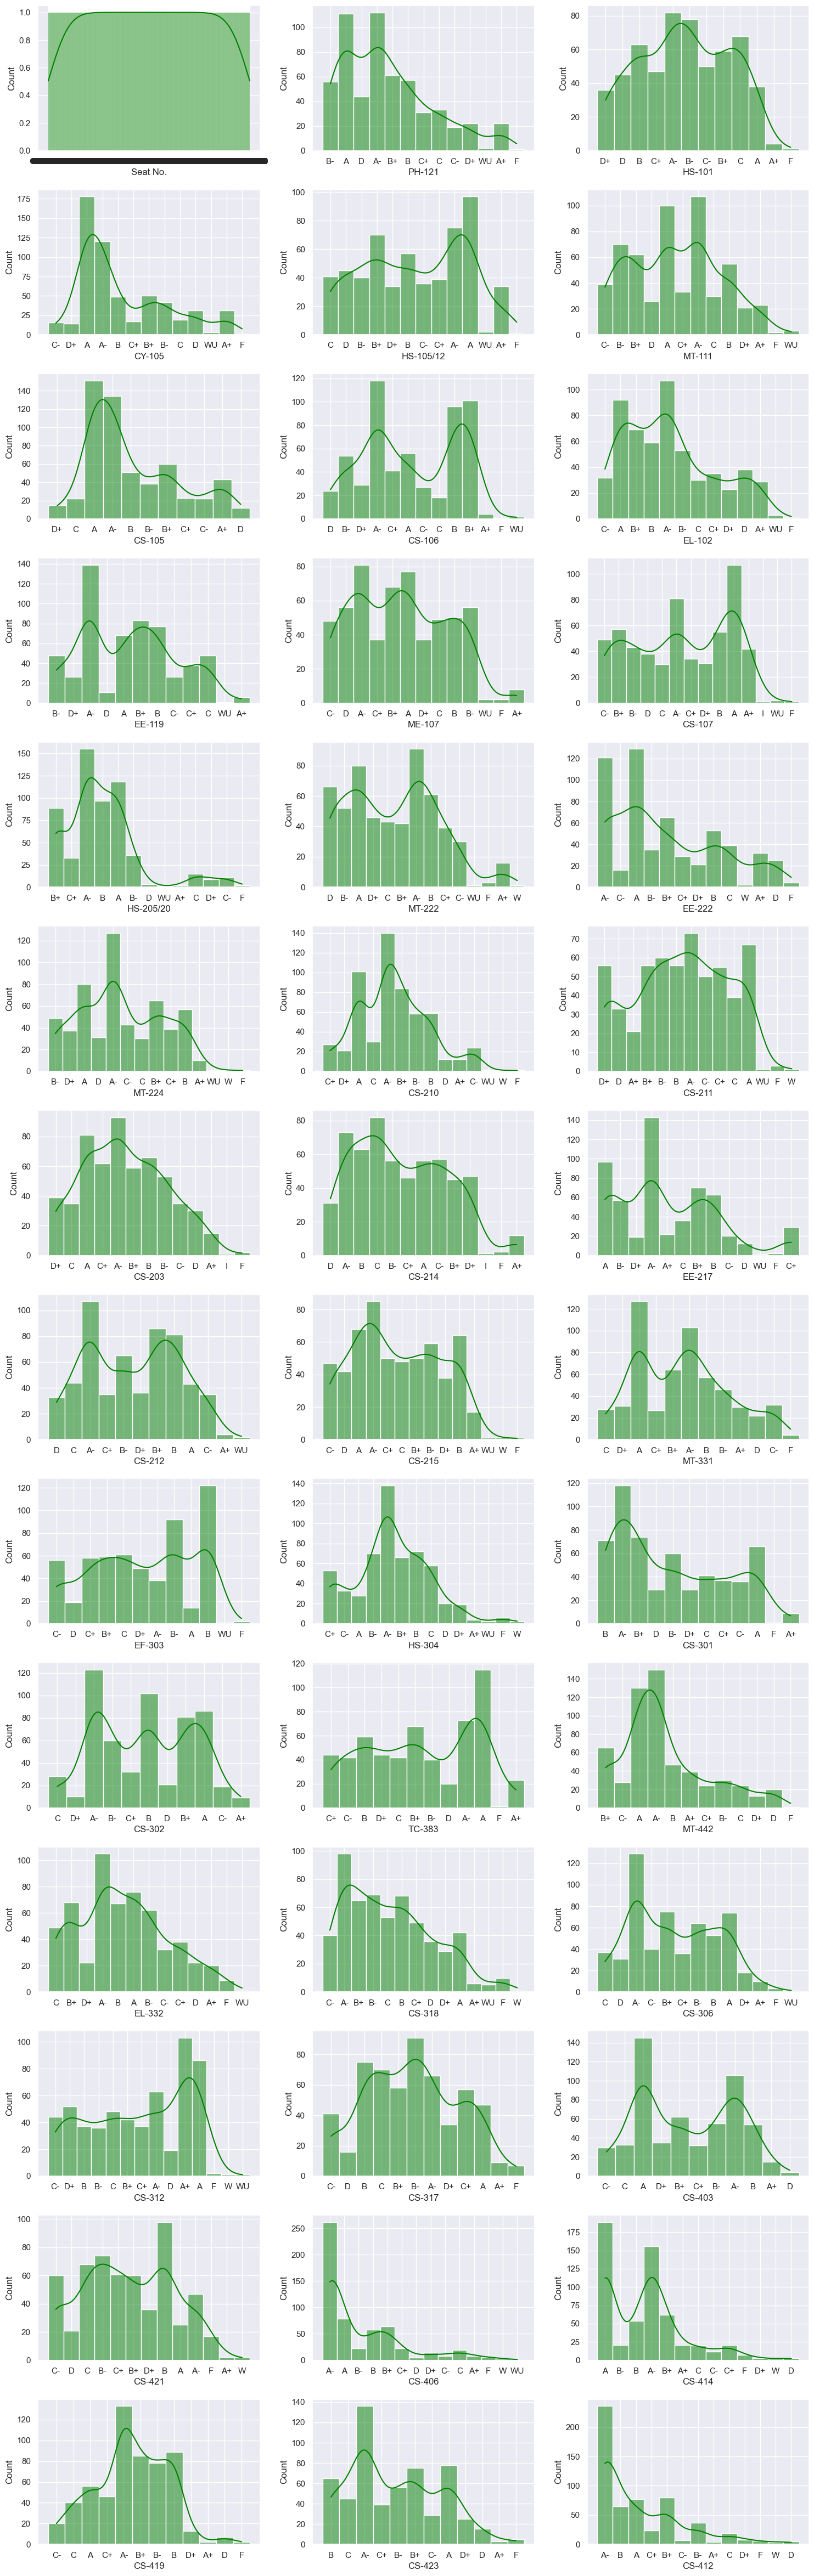

In [22]:
# count plot for all columns
plt.figure(figsize=(15,50))
plotnumber=1
for i in df2.columns[:-1]:
    if plotnumber<=43:
        plt.subplot(15,3,plotnumber)
        sns.histplot(x=i,data=df2,kde=True,color='green')
    plotnumber+=1
plt.tight_layout()
plt.show()

In [23]:
df2.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Text(0.5, 1.0, 'PH-121 VS HS-101')

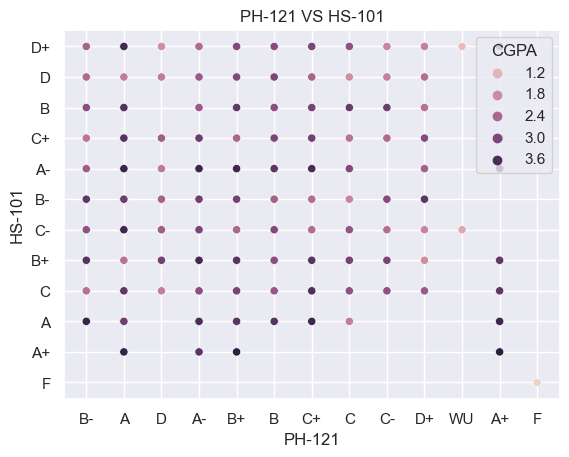

In [24]:
#scatterplot of RI VS NA

sns.scatterplot(x='PH-121',y='HS-101',data=df2, hue='CGPA')
plt.title('PH-121 VS HS-101')


Text(0.5, 1.0, 'CS-403 VS CS-421')

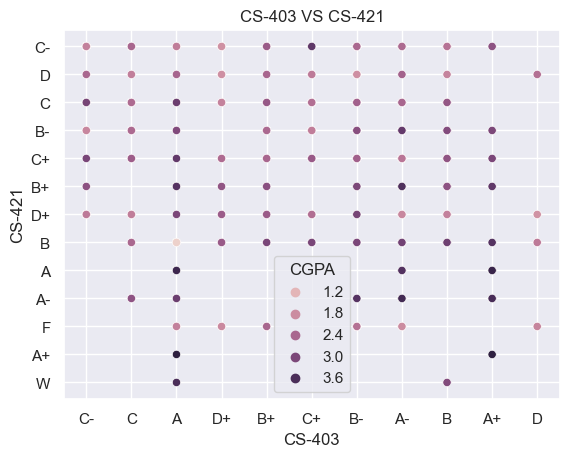

In [25]:
sns.scatterplot(x='CS-403',y='CS-421',data=df2, hue='CGPA')
plt.title('CS-403 VS CS-421')

# 7.DATA ENCODING USING ORDINAL ENCODER

In [26]:
df_enc=df2.copy()

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [28]:
for i in df_enc.columns[:-1]:
    rs=df_enc[i].values.reshape(-1,1)
    df_enc[i]=enc.fit_transform(rs)
df_enc.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448


In [29]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    float64
 1   PH-121     571 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    float64
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    float64
 19  CS-214     571 non-null    float64
 20  EE-217    

as we can see seat no eis neccessary in our dataset so we will drop  it

# 8.DROP THE SEAT NO COLUMN

In [66]:
df_enc=df_enc.drop('Seat No.',axis=1)

# 9.DATASET CORELATION USING HEATMAP

Text(0.5, 1.0, 'Heat Map')

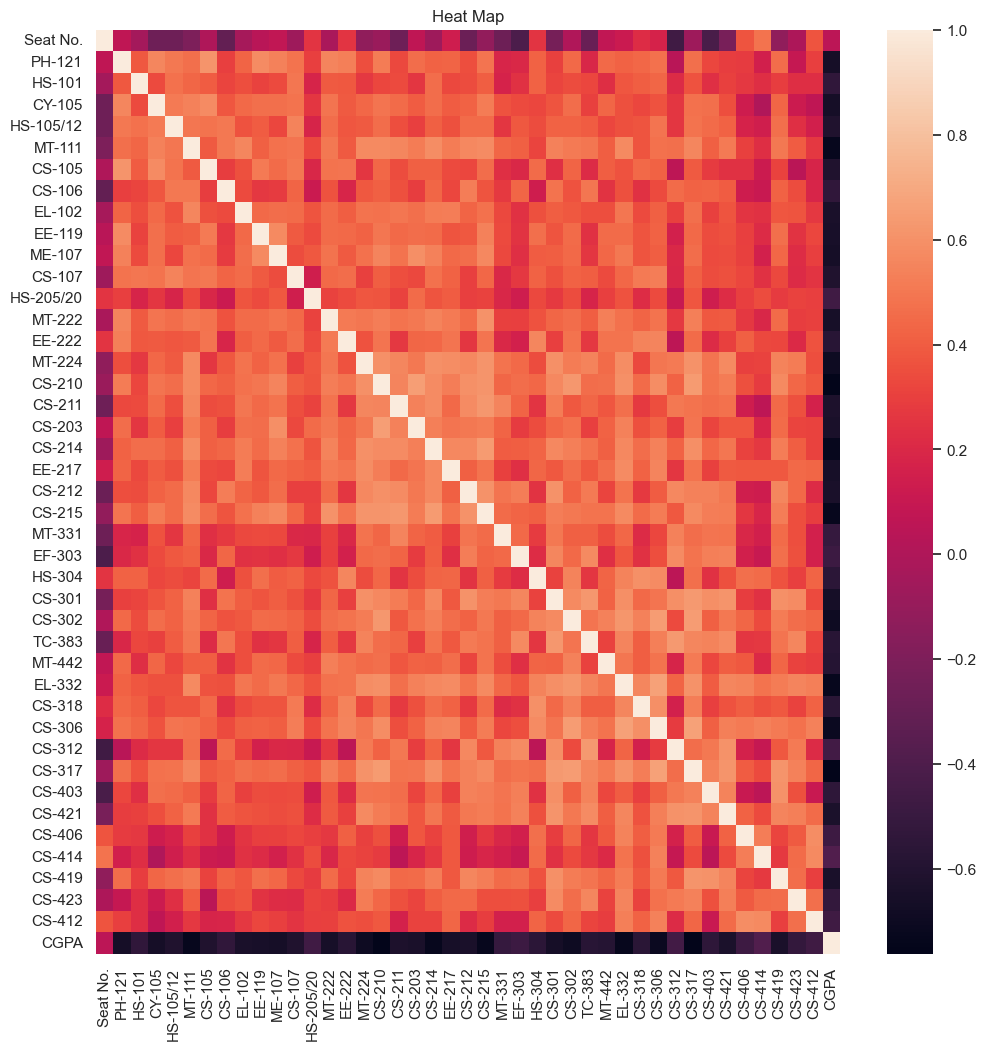

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df_enc.corr())
plt.title('Heat Map')

# 10.GETTING STATISTICAL INFORMATION 

In [67]:
df_enc.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


# 11.SPLITING THE DATASET , INDEPENDENT VARIABLES IN X AND INDEPENDENT IN Y

In [68]:
x=df_enc.drop('CGPA',axis=1)
y=df_enc['CGPA']

# TRAIN/TEST SPLIT


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 12. import the models

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 13.MODEL TRAINING

In [72]:
lr=LinearRegression()
lr.fit(x_train,y_train)

svm=SVR()
svm.fit(x_train, y_train)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)


GradientBoostingRegressor()

In [73]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [74]:
df1

,Actual,lr,svm,rf,gr
509,1.992,2.168706,2.028771,2.06024,2.129529
70,3.490,3.535124,3.643694,3.45207,3.536874
131,2.823,2.788373,2.770159,2.74692,2.737080
512,2.288,2.299550,2.145712,2.22482,2.386042
542,3.816,3.955091,3.725747,3.79638,3.829971
...,...,...,...,...,...
75,2.683,2.578218,2.679613,2.70812,2.681478
250,3.328,3.328989,3.383927,3.32695,3.379236
528,3.734,3.807730,3.585333,3.65389,3.726963
268,3.473,3.393851,3.699013,3.47324,3.469540


# 14.COMPARE PERFORMANCE VISUALLY

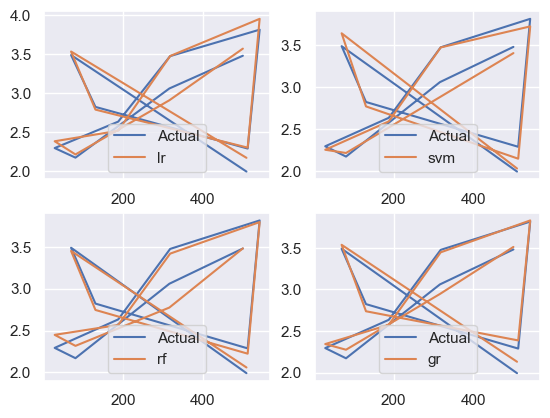

In [75]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[:11],label='Actual')
plt.plot(df1['lr'].iloc[:11],label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[:11],label='Actual')
plt.plot(df1['svm'].iloc[:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[:11],label='Actual')
plt.plot(df1['rf'].iloc[:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[:11],label='Actual')
plt.plot(df1['gr'].iloc[:11],label='gr')
plt.legend()

AS WE CAN SEE MODEL 1 AND 4 IS VERY CLOSE

# 15.EVALUATE THE MODELS

In [76]:
from sklearn import metrics

In [101]:
#calculating r2 score 
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [78]:
print(score1,score2,score3,score4)

0.9682986685105458 0.9550849384898367 0.9495828631051765 0.9655510008610041


In [79]:
#claculating mean absiolute error
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [80]:
print(s1,s2,s3,s4)

0.07753640638425004 0.08043616632084147 0.08620582608695652 0.07631792011376011


# 14.SAVING THE BEST MODEL 

In [81]:
import joblib

In [82]:
joblib.dump(gr,'student_grade_prediction')

['student_grade_prediction']

# 15.PREDICTING GRADE FOR NEW STUDENT

In [83]:
df_enc.head(1)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205


In [84]:
df_new={'PH-121':5,
        'HS-101':10, 
        'CY-105':8, 
        'HS-105/12':6, 
        'MT-111':8,
       'CS-105':10,
        'CS-106':9,
        'EL-102':8,
        'EE-119':5,
        'ME-107':8,
        'CS-107':5, 
        'HS-205/20':6,
       'MT-222':8, 
        'EE-222':10, 
        'MT-224':10,
        'CS-210':8, 
        'CS-211':9,
        'CS-203':10, 
        'CS-214':2,
       'EE-217':5, 
        'CS-212':7, 
        'CS-215':4,
        'MT-331':5, 
        'EF-303':7, 
        'HS-304':10, 
        'CS-301':6,
       'CS-302':8, 
        'TC-383':9, 
        'MT-442':9, 
        'EL-332':8, 
        'CS-318':10, 
        'CS-306':10, 
        'CS-312':8,
       'CS-317':5, 
        'CS-403':5,
        'CS-421':4, 
        'CS-406':4, 
        'CS-414':5, 
        'CS-419':8, 
        'CS-423':9,
       'CS-412':8
    
}

In [86]:
df_new1=pd.DataFrame(df_new,index=[0])

In [87]:
df_new1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,10,8,5,5,4,4,5,8,9,8


In [89]:
model=joblib.load('student_grade_prediction')

In [93]:
print('the CGPA Ffor new student is...',model.predict(df_new1))

the CGPA Ffor new student is... [2.06215371]


# End